<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos/blob/master/Distillation_Column_system_03_comparison_methods_ago_16_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import numpy.linalg as npla


########################################################
# Function to decompose the matrix
# in an upper triangular form
########################################################

def LU(A,f):
  # get the size of the system
  n = len(f)
  
  # check the size
  
  if (A.shape[0] != n) or (A.shape[1] != n):
    print('\t Inconsistent size in LU decomposition')
    info = 0
    return M,info

  # create the augmented matrix
  M = np.zeros((n,n+1))
  M[:,:-1] = A
  M[:,-1] = f

  # loop through all the colum
  # to get rid of the lower part
  for iC in range(n-1):
    # for each column loop over all the lines
    # that are below the diagonal
    # to set to 0 their elements
    for iL in range(iC+1,n):
      # check if the diagonal element
      # is null
      if(M[iC,iC] == 0):
        print('\t Zero on the diagonal, LU failed')
        info = 0
        return M,info
      # eliminate the element
      M[iL,:] = M[iL,:] - M[iL,iC]/M[iC,iC] * M[iC,:]

   # if we succed we return info = 1 and the upper augmetned matrix

  info = 1
  return M,info
      

In [2]:
########################################################
# Function to backsubstitute the results
# and get the final solution
########################################################
def BS(M):
  # get the size of the matrix
  n = M.shape[0]
  # loop over all the lines
  # starting by the end
  for iL in range(n-1,-1,-1):
    # check if we have diagonal elements on the diagonal
    if(M[iL,iL] == 0):
      print('\t Zero on the diagonal, LU failed')
      info = 0
      return M,info
    # divide the line by the diagonal element of M
    M[iL,:] /= M[iL,iL]
    
    # loop over all the lines that are above this onef
    for iLL in range(iL-1,-1,-1):
      M[iLL,:] -= M[iLL,iL]*M[iL,:]

  info = 1
  return M,info

########################################################
########################################################

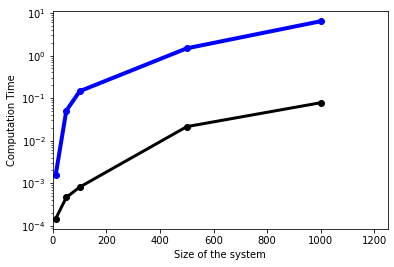

In [3]:
# size of the matrix to be calculated
SIZE = [10,50,100,500,1000]

# create list
cpu_time_numpy = []
cpu_time_mycode = []

# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)

  # nummpy
  t0 = time.clock()
  npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # mycode
  t0 = time.clock()
  M,info = LU(A,f)
  M,info = BS(M)
  cpu_time_mycode.append(time.clock()-t0)

# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=3, color='black',label='Numpy')
plt.semilogy(SIZE,cpu_time_mycode, 'o-',linewidth=4, color='blue',label='My code')
plt.xlabel('Size of the system')
plt.ylabel('Computation Time')
plt.xlim([0,1250])
plt.show()
